# Kap 7 uppgift 10

### I denna uppgift ska vi använda MNIST-datan som vi arbetat med tidigare. Detta för att ha ett bekant dataset att arbeta med och experimentera med ANN-modeller.
    a) Träna en ANN-modell på MNIST-datan. Vad får du för resultat?
    b) Prova justera hyperparametrarna med KerasTuner. Notera, du har som vanligt dokumentationen till din hjälp. Får du bättre resultat?

#### a)

In [1]:
# Importerar de bibliotek vi behöver
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Keras och TensorFlow för att bygga och träna neurala nätverk
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input
from tensorflow.keras.callbacks import EarlyStopping

##### Ladda in och förbered MNIST-datan

In [ ]:
# Ladda in MNIST datasetet
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Visa datasetet shape innan uppdelning
print("X_train_full:", X_train_full.shape)
print("X_test:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
X_train_full: (60000, 28, 28)
X_test: (10000, 28, 28)


In [3]:
# Dela upp träningsdatan i träningsdata och valideringsdata
# De första 5000 bilderna används som valideringsdata
# Vi normaliserar pixlarna till intervallet 0-1 genom att dividera med 255.0
X_train, X_valid = X_train_full[5000:] / 255.0, X_train_full[:5000] / 255.0
y_train, y_valid = y_train_full[5000:], y_train_full[:5000]

# Normaliserar även testdatan
X_test = X_test / 255.0

# Visar shapes efter uppdelning
print("X_train:", X_train.shape)
print("X_valid:", X_valid.shape)
print("X_test:", X_test.shape)

X_train: (55000, 28, 28)
X_valid: (5000, 28, 28)
X_test: (10000, 28, 28)


##### Visualisera några bilder från datasetet

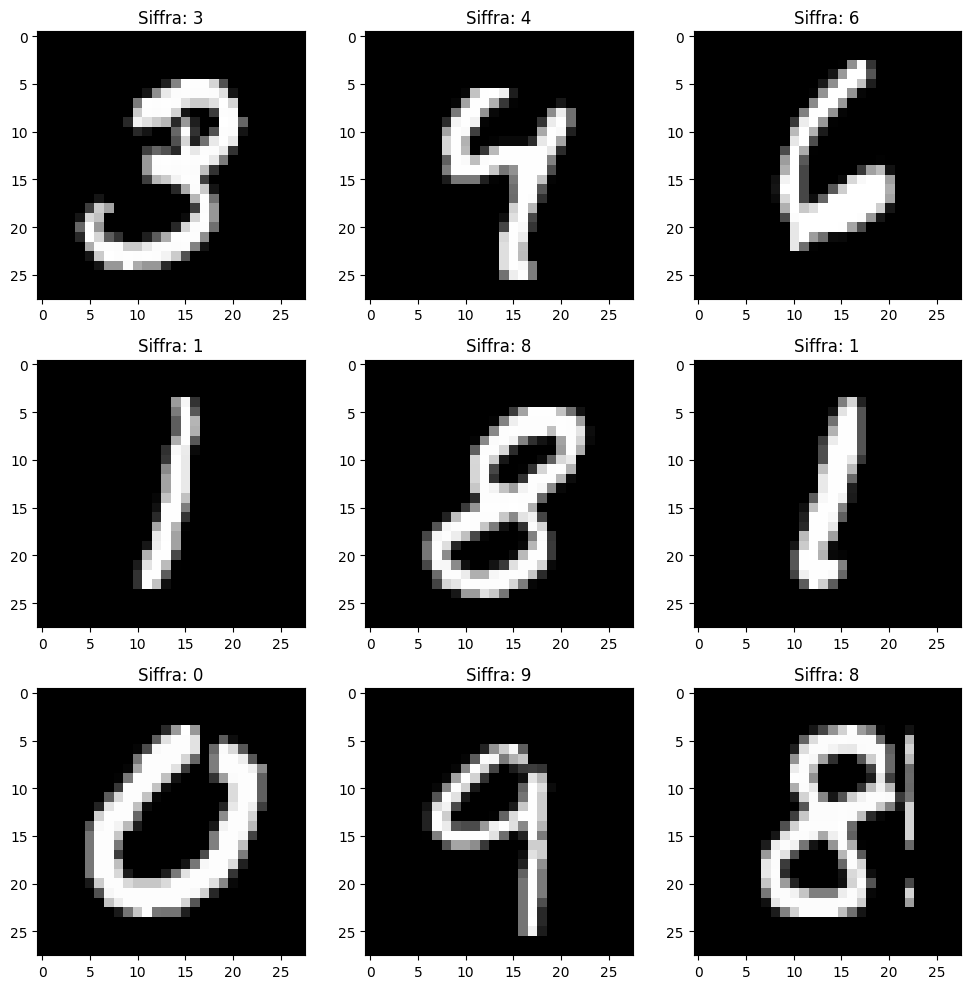

In [4]:
# Visualisera 9 bilder i ett 3x3 rutnät för att se hur datan ser ut
plt.figure(figsize=(10, 10))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    plt.imshow(X_train[i], cmap="gray")  # Gråskala eftersom MNIST är svartvita bilder
    plt.title(f"Siffra: {y_train[i]}")   # Visa vilken siffra bilden föreställer
plt.tight_layout()
plt.show()

##### Bygga ANN modellen

In [5]:
# Skapa en Sequential modell
model = Sequential()

# Specificera inputshape: bilderna är 28x28 pixlar med 1 kanal
model.add(Input(shape=(28, 28, 1)))

# Flatten gör om 2D bilderna (28x28) till 1D som modellen förväntar sig
model.add(Flatten())

# Första dolda lagret, 300 noder med Relu aktiveringsfunktion
model.add(Dense(300, activation="relu"))

# Andra dolda lagret, 100 noder med Relu aktiveringsfunktion
model.add(Dense(100, activation="relu"))

# Output lagret, 10 noder (en per siffra 0-9) med softmax för sannolikheter
model.add(Dense(10, activation="softmax"))

# Visa en summering av modellens arkitektur och antal parametrar
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

##### Kompilera och träna modellen

In [6]:
# Kompilera modellen
# sparse_categorical_crossentropy används eftersom våra y värden inte är one hot encoded
# accuracy används som utvärderingsmått
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Träna modellen i 20 epoker med valideringsdata
# Varje epok innebär att hela träningsdatan gås igenom en gång
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), verbose=2)

Epoch 1/20
1719/1719 - 2s - 1ms/step - accuracy: 0.9347 - loss: 0.2190 - val_accuracy: 0.9698 - val_loss: 0.1042
Epoch 2/20
1719/1719 - 2s - 1ms/step - accuracy: 0.9723 - loss: 0.0944 - val_accuracy: 0.9748 - val_loss: 0.0910
Epoch 3/20
1719/1719 - 2s - 1ms/step - accuracy: 0.9803 - loss: 0.0696 - val_accuracy: 0.9804 - val_loss: 0.0709
Epoch 4/20
1719/1719 - 2s - 1ms/step - accuracy: 0.9849 - loss: 0.0525 - val_accuracy: 0.9796 - val_loss: 0.0841
Epoch 5/20
1719/1719 - 2s - 1ms/step - accuracy: 0.9876 - loss: 0.0431 - val_accuracy: 0.9798 - val_loss: 0.0818
Epoch 6/20
1719/1719 - 2s - 1ms/step - accuracy: 0.9903 - loss: 0.0337 - val_accuracy: 0.9782 - val_loss: 0.0987
Epoch 7/20
1719/1719 - 2s - 1ms/step - accuracy: 0.9920 - loss: 0.0263 - val_accuracy: 0.9786 - val_loss: 0.1123
Epoch 8/20
1719/1719 - 2s - 1ms/step - accuracy: 0.9929 - loss: 0.0256 - val_accuracy: 0.9792 - val_loss: 0.1036
Epoch 9/20
1719/1719 - 2s - 1ms/step - accuracy: 0.9942 - loss: 0.0189 - val_accuracy: 0.9800 - 

##### Visualisera träningshistorik

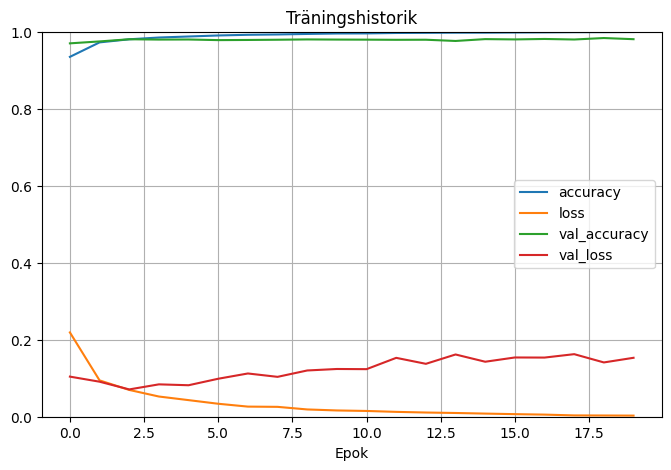

In [7]:
# Visualiserar hur loss och accuracy utvecklas under träningen
# history.history innehåller loss, accuracy, val_loss och val_accuracy för varje epok
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Träningshistorik")
plt.xlabel("Epok")
plt.show()

##### Evaluera modellen på testdata

In [8]:
# Evaluerar modellen på testdatan som modellen aldrig sett under träningen
# Detta ger oss en uppskattning av hur modellen presterar på ny osedd data
model.evaluate(X_test, y_test, verbose=2)

313/313 - 0s - 723us/step - accuracy: 0.9809 - loss: 0.1569


[0.15692618489265442, 0.98089998960495]

##### Prediktera nya observationer

In [9]:
# Ta 3 bilder från testdatan och låtsas att de är nya osedda bilder
X_new = X_test[:3]

# Modellen predikterar sannolikheter för varje klass (siffra 0-9)
y_proba = model.predict(X_new, verbose=2)
print("Sannolikheter (avrundat):")
print(y_proba.round(2))

# Väljer den klass med högst sannolikhet som slutgiltig prediktion
classes_x = np.argmax(y_proba, axis=1)

# Jämför predikterade siffror med de sanna siffrorna
print("\nPredikterade siffror:", classes_x)
print("Sanna siffror:      ", y_test[:3])

1/1 - 0s - 33ms/step
Sannolikheter (avrundat):
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]

Predikterade siffror: [7 2 1]
Sanna siffror:       [7 2 1]


#### b)

##### Importera kerastuner

In [ ]:
# Importerar kerastuner för hyperparameteroptimering
from keras_tuner import RandomSearch
from tensorflow.keras.layers import Dropout

##### Definiera build_model funktionen för kerastuner

In [18]:
# Definierar en funktion som kerastuner använder för att bygga modeller
# med olika hyperparametrar. hp-objektet låter oss definiera sökrymden.
def build_model(hp):
    nn_model = Sequential()
    nn_model.add(Input(shape=(28, 28, 1)))
    nn_model.add(Flatten())

    # Tune antal noder i det första dolda lagret (mellan 30 och 300, steg om 10)
    hp_units_1 = hp.Int('units_1', min_value=30, max_value=300, step=10)
    nn_model.add(Dense(units=hp_units_1, activation='relu'))

    # Tune om dropout ska användas efter första lagret
    if hp.Boolean("dropout_1"):
        hp_dropout_rate = hp.Choice('dropout_rate_1', values=[0.1, 0.2, 0.3, 0.4, 0.5])
        nn_model.add(Dropout(rate=hp_dropout_rate))

    # Tune antal noder i det andra dolda lagret (mellan 10 och 200, steg om 10)
    hp_units_2 = hp.Int('units_2', min_value=10, max_value=200, step=10)
    nn_model.add(Dense(units=hp_units_2, activation='relu'))

    # Tune om dropout ska användas efter andra lagret
    if hp.Boolean("dropout_2"):
        hp_dropout_rate = hp.Choice('dropout_rate_2', values=[0.1, 0.2, 0.3, 0.4, 0.5])
        nn_model.add(Dropout(rate=hp_dropout_rate))

    # Tune antal extra lager (1-3 stycken)
    for i in range(hp.Int("num_layers", 1, 3)):
        nn_model.add(Dense(
            units=hp.Int(f"units_{i+2}", min_value=10, max_value=150, step=5),
            activation='relu'))

    # Output lagret: 10 noder med softmax (en per siffra 0-9)
    nn_model.add(Dense(10, activation='softmax'))

    # Kompilerar modellen med adam  och sparse_categorical_crossentropy
    nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return nn_model

##### Kör kerastuner

In [19]:
# Skapar en randomsearch tuner som testar olika hyperparameterkombinationer
# objective='val_accuracy' innebär att jag vill maximera accuracy på valideringsdata
# max_trials=10 innebär att 10 olika kombinationer testas
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    overwrite=True,
)

# earlystopping stoppar träningen om valideringsfelet inte förbättras på 2 epoker
early_stopping_monitor = EarlyStopping(patience=2)

# Kör sökningen: testar olika hyperparametrar och tränar varje modell i 20 epoker (samma som del a)
tuner.search(X_train, y_train, validation_split=0.2, epochs=20, callbacks=[early_stopping_monitor], verbose=2)

# Visar en sammanfattning av resultaten
tuner.results_summary()

Trial 10 Complete [00h 00m 14s]
val_accuracy: 0.9702727198600769

Best val_accuracy So Far: 0.9769999980926514
Total elapsed time: 00h 02m 33s
Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 08 summary
Hyperparameters:
units_1: 140
dropout_1: True
units_2: 180
dropout_2: False
num_layers: 2
dropout_rate_1: 0.5
units_3: 55
units_4: 45
dropout_rate_2: 0.4
Score: 0.9769999980926514

Trial 00 summary
Hyperparameters:
units_1: 190
dropout_1: True
units_2: 70
dropout_2: False
num_layers: 3
dropout_rate_1: 0.1
units_3: 10
units_4: 10
Score: 0.9760000109672546

Trial 07 summary
Hyperparameters:
units_1: 170
dropout_1: True
units_2: 110
dropout_2: False
num_layers: 2
dropout_rate_1: 0.1
units_3: 130
units_4: 105
dropout_rate_2: 0.5
Score: 0.9752727150917053

Trial 06 summary
Hyperparameters:
units_1: 140
dropout_1: False
units_2: 30
dropout_2: False
num_layers: 1
dropout_rate_1: 0.5
units_3: 10
units_4: 30
dropout_rate_

##### Träna bästa modellen vidare

In [20]:
# Hämtar den bästa modellen som kerastuner hittade
tuned_model = tuner.get_best_models(num_models=1)[0]
tuned_model.build()

# Träna den bästa modellen vidare med fler epoker och earlystopping
# earlystopping avslutar träningen om val_loss inte förbättras på 3 epoker
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Använder epochs=20 för en rättvis jämförelse med del a)
tuned_model.fit(X_train, y_train, validation_split=0.2, epochs=20,
                callbacks=[early_stop], verbose=2)

Epoch 1/20


c:\Users\edrin\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1375/1375 - 2s - 2ms/step - accuracy: 0.9681 - loss: 0.1079 - val_accuracy: 0.9755 - val_loss: 0.0874
Epoch 2/20
1375/1375 - 2s - 1ms/step - accuracy: 0.9668 - loss: 0.1055 - val_accuracy: 0.9764 - val_loss: 0.0894
Epoch 3/20
1375/1375 - 2s - 1ms/step - accuracy: 0.9681 - loss: 0.1028 - val_accuracy: 0.9732 - val_loss: 0.0892
Epoch 4/20
1375/1375 - 2s - 1ms/step - accuracy: 0.9689 - loss: 0.1008 - val_accuracy: 0.9738 - val_loss: 0.0886


##### Evaluera den optimerade modellen på testdata

In [21]:
# Evaluera den optimerade modellen på testdatan
# Jämför detta resultat med resultatet från del a) för att se om det blev bättre
print("Resultat för den kerastuner optimerade modellen:")
tuned_model.evaluate(X_test, y_test, verbose=2)

Resultat för den kerastuner optimerade modellen:
313/313 - 0s - 815us/step - accuracy: 0.9775 - loss: 0.0804


[0.08044786006212234, 0.9775000214576721]

##### Sammanfattning

I **del a)** byggde vi en ANN-modell med en fast arkitektur (300-100 noder i dolda lager) och tränade den på MNIST-datan. 

I **del b)** använde vi KerasTuner (RandomSearch) för att automatiskt söka efter bättre hyperparametrar, t.ex. antal noder i varje lager, om dropout ska användas och antal extra lager. Genom att jämföra test-accuracy från del a) och del b) kan vi se om hyperparameteroptimeringen gav ett bättre resultat.

##### Jämförelse av resultaten

In [22]:
# Evaluera båda modellerna på testdatan för att jämföra
loss_a, accuracy_a = model.evaluate(X_test, y_test, verbose=0)
loss_b, accuracy_b = tuned_model.evaluate(X_test, y_test, verbose=0)

# Skapa en tabell med resultaten för enkel jämförelse
resultat = pd.DataFrame({
    "Modell": ["a) ANN (300-100)", "b) kerastuner optimerad"],
    "Test Accuracy": [f"{accuracy_a:.4f}", f"{accuracy_b:.4f}"],
    "Test Loss": [f"{loss_a:.4f}", f"{loss_b:.4f}"]
})
print(resultat.to_string(index=False))

# Jämförelse
print(f"\nSkillnad i accuracy: {(accuracy_b - accuracy_a):.4f}")
if accuracy_b > accuracy_a:
    print("kerastuner modellen presterade bättre!")
else:
    print("Grundmodellen från del a) presterade bättre.")

                 Modell Test Accuracy Test Loss
       a) ANN (300-100)        0.9809    0.1569
b) kerastuner optimerad        0.9775    0.0804

Skillnad i accuracy: -0.0034
Grundmodellen från del a) presterade bättre.
